# EDA
## MovieViewing

In [225]:
k_movie['MOVIE_SDIV_NM'].values.categories

Index(['독립/예술영화', '일반영화'], dtype='object')

In [226]:
k_movie['MOVIE_SDIV_NM'].value_counts().sort_index()

독립/예술영화    255
일반영화       113
Name: MOVIE_SDIV_NM, dtype: int64

In [ ]:
k_movie['MOVIE_SDIV_NM']

In [224]:
k_movie['GENRE_NM'].values.categories

Index(['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬',
       '미스터리', '범죄', '사극', '스릴러', '애니메이션', '액션', '어드벤처', '코미디', '판타지'],
      dtype='object')


In [47]:
k_genre = k_movie['GENRE_NM'].value_counts().sort_index()

SF          5
가족          6
공연         29
공포(호러)      9
기타         10
다큐멘터리      79
드라마       139
멜로/로맨스     14
뮤지컬        10
미스터리        8
범죄         10
사극          3
스릴러         5
애니메이션       9
액션         17
어드벤처        1
코미디        28
판타지         1
Name: GENRE_NM, dtype: int64

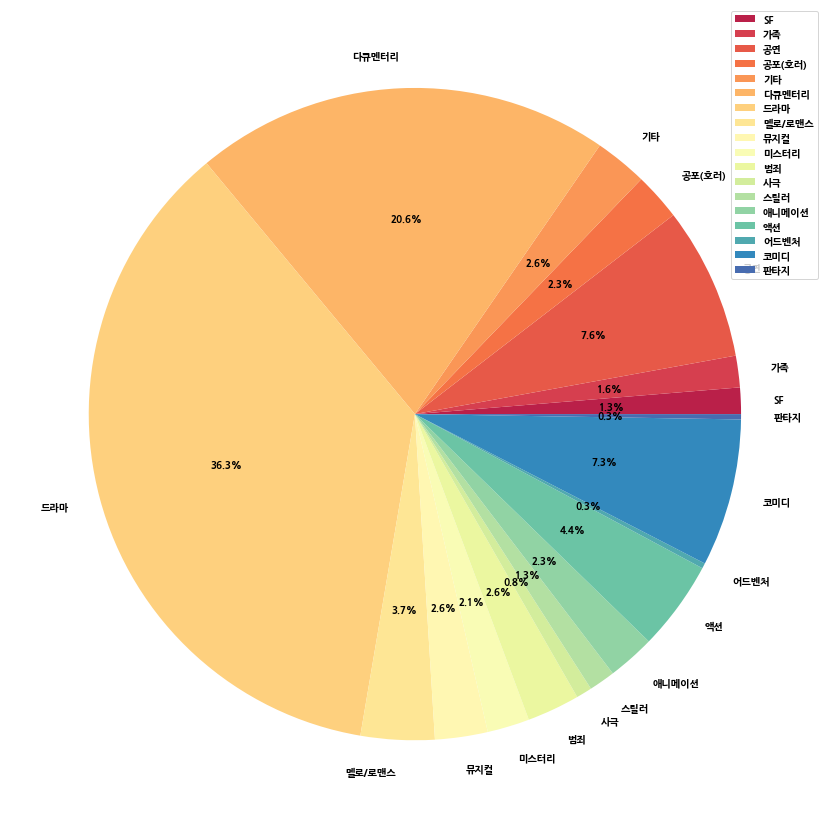

In [72]:
color = sns.color_palette('Spectral', len(k_genre.index))

fig, ax = plt.subplots(figsize=(20,15))
plt.pie(k_genre, labels = k_genre.index, autopct='%.1f%%', colors=color)
plt.legend()
plt.show()

<AxesSubplot:>

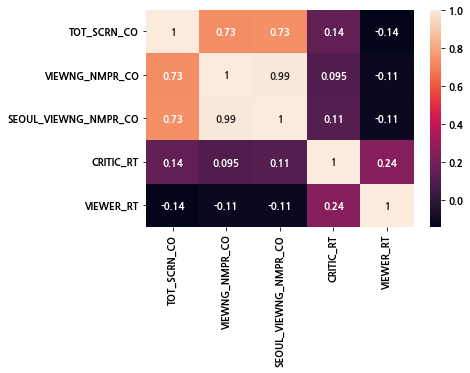

In [259]:
corr = k_movie.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2g')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


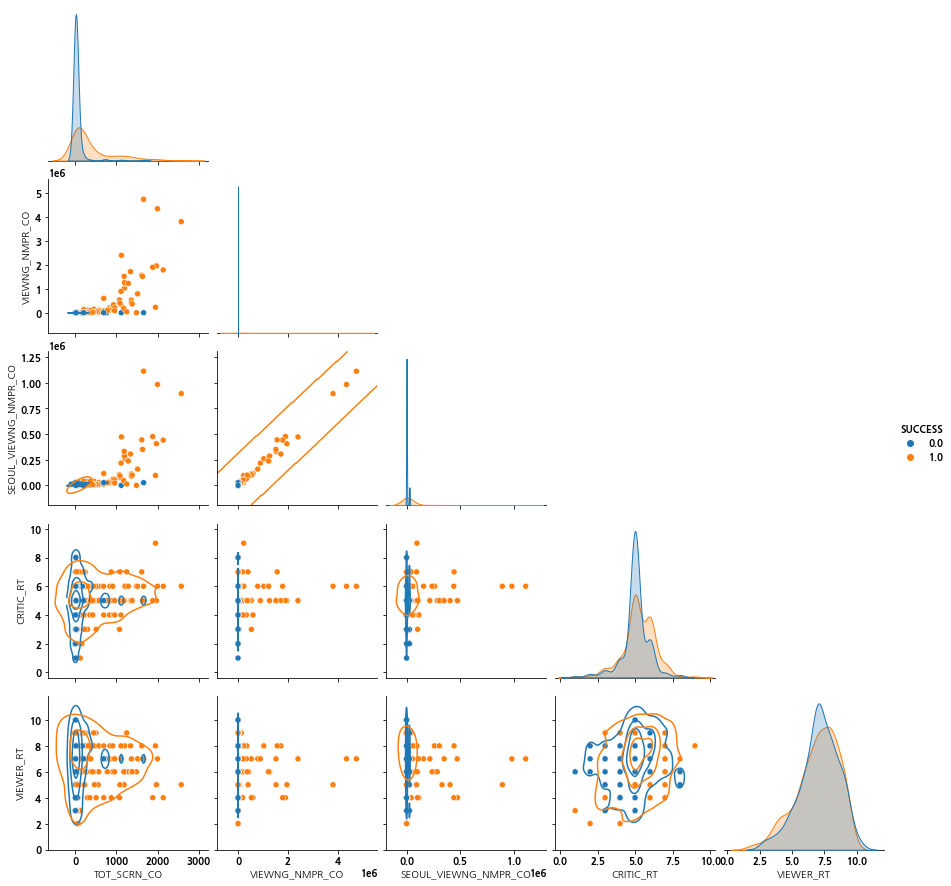

In [273]:
p = sns.pairplot(k_movie, hue = "SUCCESS", corner = True)
p.map_lower(sns.kdeplot, levels=4, color=".2")

Text(0.5, 0, 'SEOUL_VIEWING_NMPR_CO')

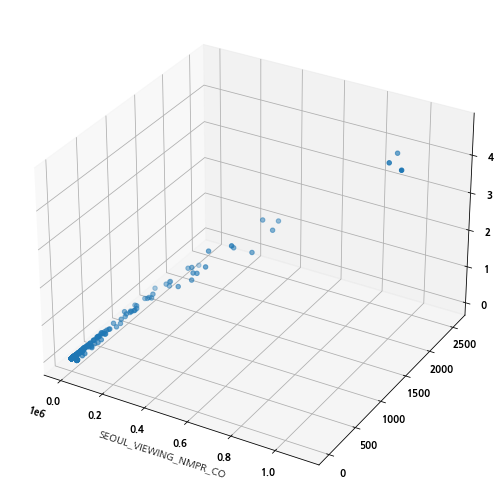

In [231]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(15, 9))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(k_movie['SEOUL_VIEWNG_NMPR_CO'], k_movie['TOT_SCRN_CO'], k_movie['VIEWNG_NMPR_CO'])
# ax.set_xlabel('SEOUL_VIEWING_NMPR_CO')

In [ ]:
#총 스크린 수와 서울 관람객 수 사이 상관관계 높음
#따라서, feature extraction - PCA

In [116]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
k_movie_cols_scaled = scaler.fit_transform(k_movie[['TOT_SCRN_CO', 'SEOUL_VIEWNG_NMPR_CO']])

pca = PCA(n_components=1)
pca.fit(k_movie_cols_scaled)
print(pca.explained_variance_ratio_)

[0.88712881]


In [232]:
k_movie_pca = pca.transform(k_movie_cols_scaled)
k_movie_pca

array([[-4.21597713e-01],
       [-1.83361692e-01],
       [ 4.17000802e+00],
       [ 2.83101150e+00],
       [ 4.26437465e-01],
       [-4.49204978e-01],
       [-2.63644283e-01],
       [-2.61548096e-01],
       [-3.27606581e-01],
       [ 2.20674429e+00],
       [-2.31382633e-01],
       [ 1.52447279e+00],
       [-3.99441574e-01],
       [-2.35772827e-01],
       [ 6.91521928e-02],
       [-3.82644773e-01],
       [-4.27922871e-01],
       [ 2.75672417e-03],
       [-5.48669976e-01],
       [-2.44390375e-01],
       [-2.25807886e-01],
       [-4.04215469e-01],
       [-3.94679049e-01],
       [ 1.16044577e+00],
       [ 2.27604837e-01],
       [-5.19292526e-01],
       [ 5.41971206e-01],
       [-5.43731942e-01],
       [-5.43561394e-01],
       [-7.71479770e-02],
       [-5.20772056e-01],
       [-5.08038638e-01],
       [ 4.06500806e+00],
       [-5.52284145e-01],
       [ 7.72885520e+00],
       [ 1.30036789e+00],
       [-5.47459810e-01],
       [-5.15141908e-01],
       [ 4.6